In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split,
    KFold,
    RepeatedKFold,
    cross_val_score,
    GridSearchCV,
)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay

from utils import load_all_images

PIXELS = 100


In [66]:
# settings
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (7, 5)

In [67]:
X, y = load_all_images(classes=['sunny', 'cloudy'], pixels=PIXELS)
len(X)

595

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, shuffle=True, random_state=123
)

# Binary Classification

## LogisticRegression

### Basic

In [76]:
# create Logisitc Model
log_model = LogisticRegression(max_iter=1000)

result = log_model.fit(X_train, y_train)

In [77]:
#| echo: false
print(f'Model accuracy: {result.score(X_test, y_test):.3}')
print(f'Model accuracy: {result.score(X_train, y_train):.3}')

Model accuracy: 0.682
Model accuracy: 0.983


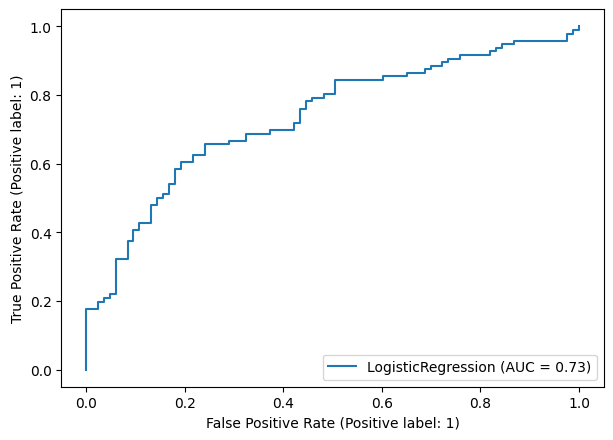

In [78]:
RocCurveDisplay.from_estimator(result, X_test, y_test)
plt.show()

### Tuning

In [79]:
# create Logisitc Model
log_cv = LogisticRegressionCV(
    cv=10, solver="liblinear", scoring="roc_auc", n_jobs=-1
)

# train
results = log_cv.fit(X_train, y_train)

Model accuracy: 0.768
Model accuracy: 0.768


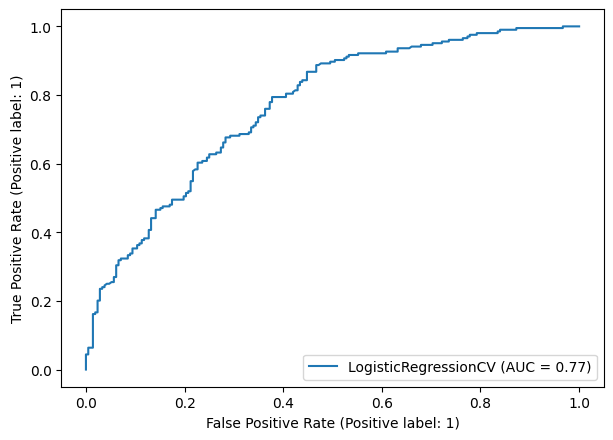

In [89]:
#| echo: false
print(f'Model accuracy: {results.score(X_test, y_test):.3}')
print(f'Model accuracy: {results.score(X_train, y_train):.3}')

RocCurveDisplay.from_estimator(results, X_train, y_train)
plt.show()

## KNN
### Basic

In [84]:
# create KNN model
knn = KNeighborsClassifier()

knn_result = knn.fit(X_train, y_train)

Model accuracy: 0.721
Model accuracy: 0.748


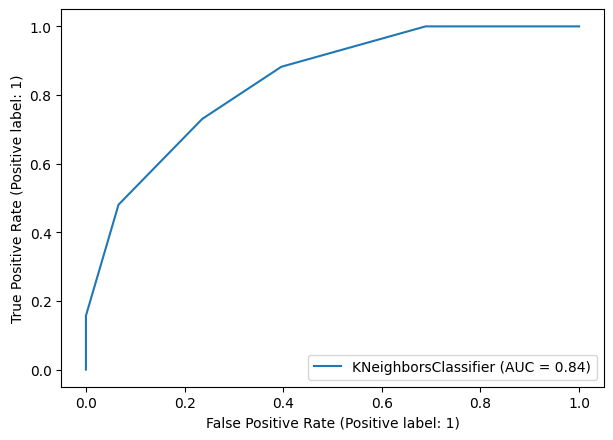

In [91]:
#| echo: false
print(f'Model accuracy: {knn_result.score(X_test, y_test):.3}')
print(f'Model accuracy: {knn_result.score(X_train, y_train):.3}')

RocCurveDisplay.from_estimator(knn_result, X_train, y_train)
plt.show()

### Tuning

In [93]:
# create repeated 10-Fold
kfold = RepeatedKFold(n_splits=5, n_repeats=10)

param_grid = {"n_neighbors": range(1, 50, 4)}

knn_search = GridSearchCV(
    knn, param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1
)
result = knn_search.fit(X_train, y_train)

Model accuracy: 0.794
Model accuracy: 0.75


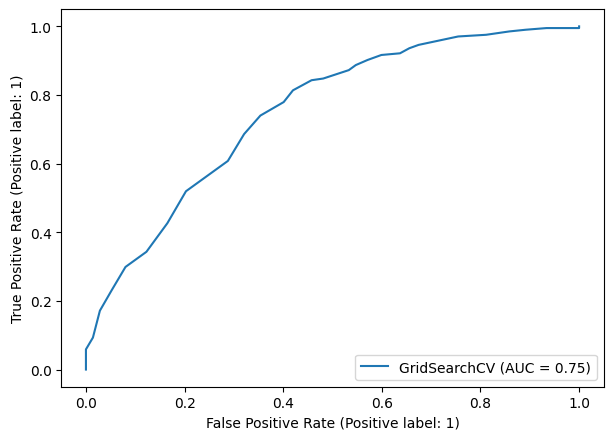

In [96]:
#| echo: false
print(f'Model accuracy: {result.score(X_test, y_test):.3}')
print(f'Model accuracy: {result.score(X_train, y_train):.3}')

RocCurveDisplay.from_estimator(result, X_train, y_train)
plt.show()